<a href="https://colab.research.google.com/github/Mahdi-Saadati/Advanced-Machine-Learning-and-Deep-Neural-Networks/blob/main/7.a.%20Recurrent%20Neural%20Network%20(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

🌱 شبکه های عصبی بازگشتی (Recurrent Neural Network (RNN))

🧠 ایده اصلی RNN

شبکه‌های معمولی فقط همون لحظه به داده نگاه می‌کنن.

ولی در خیلی از مسائل، گذشته هم مهمه. مثلاً:

وقتی داری یک متن می‌خونی، معنی کلمه‌ی الان به کلمات قبلش بستگی داره.

وقتی به ECG نگاه می‌کنیم، وضعیت الان قلب به ضربان‌های قبلی بستگی داره.

اینجاست که RNN وارد میشه 👇

🔄 فرق RNN با شبکه‌های ساده

در RNN هر خروجی فقط به ورودی الان وابسته نیست،
بلکه به یادآوری از قبل هم وابسته است.

یعنی شبکه یک "حافظه کوچک" داره که اتفاقات قبلی رو ذخیره می‌کنه.

📦 تشبیه خیلی ساده

تصور کن یک نفر داره جمله‌ای رو می‌نویسه:

شبکه‌ی ساده فقط همون کلمه‌ای که الان می‌بینه رو پردازش می‌کنه.

ولی RNN مثل کسیه که دفترچه یادداشت داره و تا الان هرچی خونده یادش می‌مونه و در تفسیر کلمه‌ی جدید ازش استفاده می‌کنه.

✨ کاربردهای RNN

زبان و متن → ترجمه، چت‌بات، پیش‌بینی کلمه بعدی.

صدا → تشخیص گفتار، تولید موسیقی.

پزشکی → تحلیل ECG، EEG، یا علائم حیاتی بیماران.

مالی → پیش‌بینی قیمت سهام یا ارز.

📌 یک جمله‌ی خیلی ساده

👉 RNN یعنی یک شبکه عصبی که علاوه بر دیدن "الان"، گذشته رو هم در نظر می‌گیره.




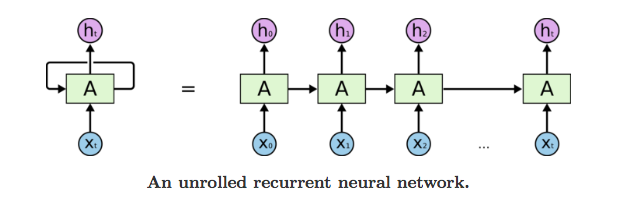

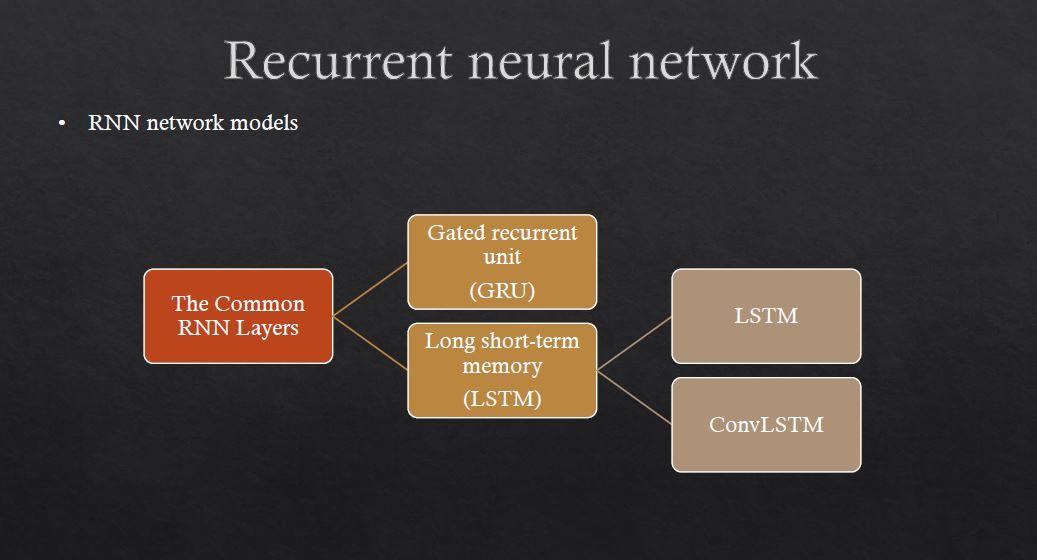

<div dir="rtl" align="right">

مثال
پیشبینی سیگنال های قلبی

یکی از معروف‌ترین دیتاست‌ها در حوزه پزشکی ECG (سیگنال قلب) هست.

Signal lenght: 300.00 Second, samples number: 108000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0894 - val_loss: 0.0030
Epoch 2/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 3/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 4/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 5/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 6/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 7/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 8/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 9/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 10/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0020 - val_loss: 0.0014
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


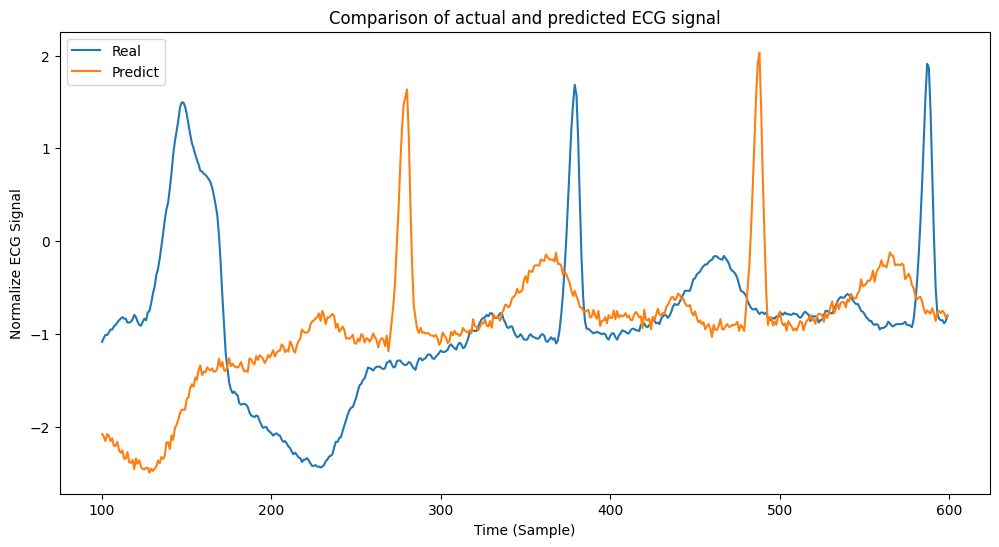

In [1]:
import numpy as np  # کتابخانه numpy برای کار با آرایه‌ها و محاسبات عددی
import matplotlib.pyplot as plt  # کتابخانه matplotlib برای رسم نمودار
from scipy.datasets import electrocardiogram  # بارگذاری داده ECG آماده از scipy
from tensorflow.keras.models import Sequential  # مدل ترتیبی برای ساخت شبکه عصبی
from tensorflow.keras.layers import SimpleRNN, Dense  # لایه‌های RNN ساده و Dense (خروجی)
from tensorflow.keras.optimizers import Adam  # بهینه‌ساز Adam

# 1. بارگذاری داده
signal = electrocardiogram()  # بارگذاری سیگنال ECG (یک آرایه ۱ بعدی طولانی)
fs = 360  # نرخ نمونه‌برداری ECG یعنی در هر ثانیه ۳۶۰ نقطه ثبت شده
duration = signal.shape[0] / fs  # مدت زمان کل سیگنال = تعداد نمونه‌ها تقسیم بر نرخ نمونه‌برداری
print(f"Signal lenght: {duration:.2f} Second, samples number: {signal.shape[0]}")
# چاپ مدت زمان سیگنال و تعداد نقاط

# 2. نرمال‌سازی یا مقیاس‌دهی
signal = (signal - np.mean(signal)) / np.std(signal)
# سیگنال را طوری تغییر می‌دهیم که میانگینش صفر و انحراف معیارش ۱ شود (مناسب برای شبکه عصبی)

# 3. آماده‌سازی توالی‌ها (sliding window)
TIME_STEPS = 100  # تعداد نمونه‌های گذشته برای پیش‌بینی نمونه بعدی
X, Y = [], []
for i in range(len(signal) - TIME_STEPS):  # روی کل سیگنال حرکت می‌کنیم
    X.append(signal[i:i+TIME_STEPS])  # یک تکه ۱۰۰تایی از سیگنال
    Y.append(signal[i+TIME_STEPS])    # مقدار بعد از آن تکه (هدف پیش‌بینی)
X = np.array(X)  # تبدیل لیست‌ها به آرایه numpy
Y = np.array(Y)

# reshape برای RNN: (تعداد نمونه‌ها، طول توالی، ویژگی‌ها)
X = X.reshape((X.shape[0], X.shape[1], 1))
# اینجا ویژگی فقط ۱ است (شدت سیگنال در هر نقطه)

# تقسیم به تست و آموزش
split = int(0.8 * len(X))  # ۸۰٪ آموزش و ۲۰٪ تست
X_train, X_test = X[:split], X[split:]  # داده‌های ورودی آموزش و تست
Y_train, Y_test = Y[:split], Y[split:]  # داده‌های خروجی آموزش و تست

# 4. ساخت مدل RNN ساده
model = Sequential([  # مدل ترتیبی
    SimpleRNN(50, activation='tanh', input_shape=(TIME_STEPS, 1)),  # لایه RNN با ۵۰ نرون
    Dense(1)  # لایه خروجی یک مقدار عددی (پیش‌بینی سیگنال)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
# استفاده از Adam برای آموزش و mse (میانگین مربع خطا) به عنوان تابع هزینه

# 5. آموزش
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))
# آموزش شبکه روی داده‌ها برای ۱۰ بار تکرار، با دسته‌های ۶۴تایی، و بررسی روی داده تست

# 6. پیش‌بینی و رسم
pred = model.predict(X_test)  # پیش‌بینی سیگنال‌های تست

# رسم مقداری از سیگنال واقعی و پیش‌بینی‌شده
plt.figure(figsize=(12,6))  # اندازه نمودار
plt.plot(range(TIME_STEPS, TIME_STEPS + 500), signal[split:split+500], label='Real')
# رسم ۵۰۰ نمونه واقعی از سیگنال تست
plt.plot(range(TIME_STEPS, TIME_STEPS + 500), pred[:500].flatten(), label='Predict')
# رسم ۵۰۰ نمونه پیش‌بینی‌شده
plt.legend()  # نمایش راهنما
plt.xlabel('Time (Sample)')
plt.ylabel('Normalize ECG Signal')
plt.title('Comparison of actual and predicted ECG signal')
plt.show()  # نمایش نمودار


<div dir="rtl" align="right">

🔎 توضیح

دیتاست ECG SciPy یک سیگنال واقعی از دیتابیس MIT-BIH است.

هر بار ۱۰۰ نمونه قبلی را به مدل می‌دهیم تا نمونه‌ی بعدی را پیش‌بینی کند.

از LSTM استفاده کردیم چون بهتر از RNN ساده حافظه‌ی طولانی‌مدت را نگه می‌دارد.

نمودار نهایی مقایسه بین سیگنال واقعی و پیش‌بینی است.